In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import os

In [6]:
os.listdir(r"C:\Users\ashwa\Downloads\DATA PROJECTS\Data Analytics Real World Project -Python\5-Sales Data Analysis\Sales_Data")

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [7]:
files = [file for file in os.listdir(r"C:\Users\ashwa\Downloads\DATA PROJECTS\Data Analytics Real World Project -Python\5-Sales Data Analysis\Sales_Data")]

In [8]:
files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [18]:
path = r"C:\Users\ashwa\Downloads\DATA PROJECTS\Data Analytics Real World Project -Python\5-Sales Data Analysis\Sales_Data"
all_df = pd.DataFrame()

for file in files:
    curr_df = pd.read_csv(path + '/'+ file)
    all_df = pd.concat([all_df, curr_df])

In [19]:
all_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [20]:
all_df.shape

(186850, 6)

In [21]:
all_df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [22]:
all_df = all_df.dropna(how ='all')

In [23]:
all_df.shape

(186305, 6)

In [24]:
all_df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [25]:
all_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [26]:
#Monthly sales analysis

In [27]:
all_df['month'] = all_df['Order Date'].apply(lambda x : x.split('/')[0])

In [28]:
all_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [29]:
all_df['month'].uniquee()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [30]:
filter = all_df['month']=='Order Date'

all_df = all_df[-filter]

In [31]:
all_df['month'].unique()

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

In [32]:
all_df['month'] = all_df['month'].astype(int)

<ipython-input-32-b33dfc2ee03b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df['month'] = all_df['month'].astype(int)


In [33]:
all_df['Quantity Ordered'] = all_df['Quantity Ordered'].astype(int)
all_df['Price Each'] = all_df['Price Each'].astype(float)

<ipython-input-33-e7af5cbcaeb5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df['Quantity Ordered'] = all_df['Quantity Ordered'].astype(int)
<ipython-input-33-e7af5cbcaeb5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df['Price Each'] = all_df['Price Each'].astype(float)


In [35]:
all_df.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
month                 int32
dtype: object

In [36]:
all_df['sales'] = all_df['Quantity Ordered']* all_df['Price Each']

<ipython-input-36-c6730f246981>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df['sales'] = all_df['Quantity Ordered']* all_df['Price Each']


In [37]:
all_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [51]:
df1 = pd.DataFrame(all_df.groupby('month')['sales'].sum())
df1.columns

Index(['sales'], dtype='object')

<AxesSubplot:xlabel='month'>

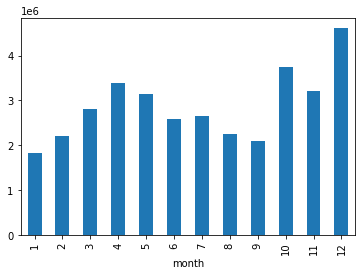

In [56]:
df1['sales'].plot(kind='bar')

Text(0, 0.5, 'Sales')

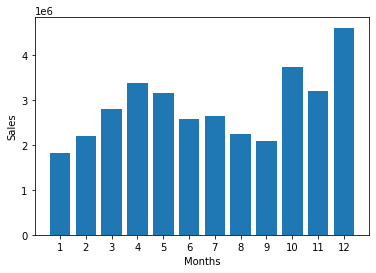

In [57]:
plt.bar(range(1,13), all_df.groupby('month')['sales'].sum())
plt.xticks(range(1,13))
plt.xlabel('Months')
plt.ylabel('Sales')

In [58]:
#city with max order

In [59]:
all_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [65]:
str = '917 1st St, Dallas, TX 75001'
str.split(',')[1]

' Dallas'

In [66]:
all_df['City'] = all_df['Purchase Address'].apply(lambda x : x.split(',')[1])

<ipython-input-66-2364581ad2a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df['City'] = all_df['Purchase Address'].apply(lambda x : x.split(',')[1])


In [67]:
all_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


<AxesSubplot:xlabel='City'>

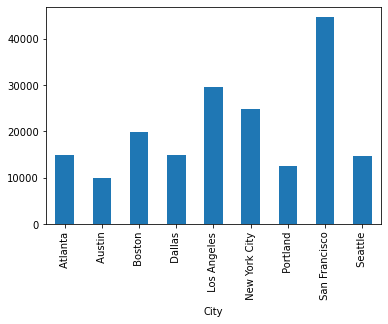

In [77]:
all_df.groupby('City')['City'].count().plot.bar()

In [78]:
list(all_df['City'].unique())

[' Dallas',
 ' Boston',
 ' Los Angeles',
 ' San Francisco',
 ' Seattle',
 ' Atlanta',
 ' New York City',
 ' Portland',
 ' Austin']

In [80]:
#At what hour sales is max

In [81]:
all_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [87]:
all_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,City,hour
0,176558,USB-C Charging Cable,2,11.95,8,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,0
2,176559,Bose SoundSport Headphones,1,99.99,22,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,0
3,176560,Google Phone,1,600.00,14,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,0
4,176560,Wired Headphones,1,11.99,14,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,0
5,176561,Wired Headphones,1,11.99,9,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,0


In [92]:
all_df = all_df.rename(columns={'Order Date': 'Order Date/Hour'})

<AxesSubplot:xlabel='Order Date/Hour'>

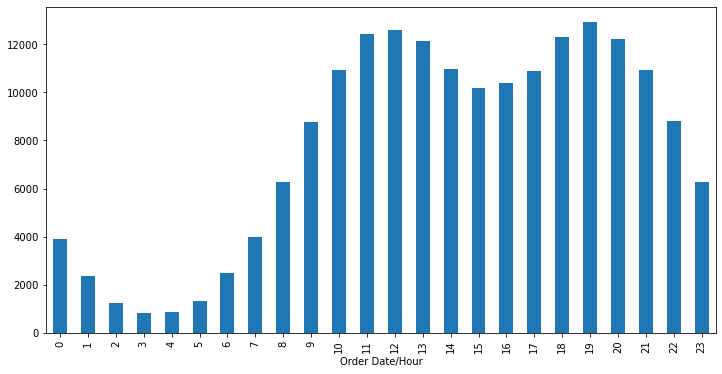

In [98]:
plt.figure(figsize=(12,6))
all_df.groupby('Order Date/Hour')['sales'].count().plot.bar()

In [99]:
#Which product sold the most and why

In [100]:
all_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date/Hour,Purchase Address,month,sales,City,hour
0,176558,USB-C Charging Cable,2,11.95,8,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,0
2,176559,Bose SoundSport Headphones,1,99.99,22,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,0
3,176560,Google Phone,1,600.00,14,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,0
4,176560,Wired Headphones,1,11.99,14,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,0
5,176561,Wired Headphones,1,11.99,9,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,0


In [101]:
all_df['Product'].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

<AxesSubplot:xlabel='Product'>

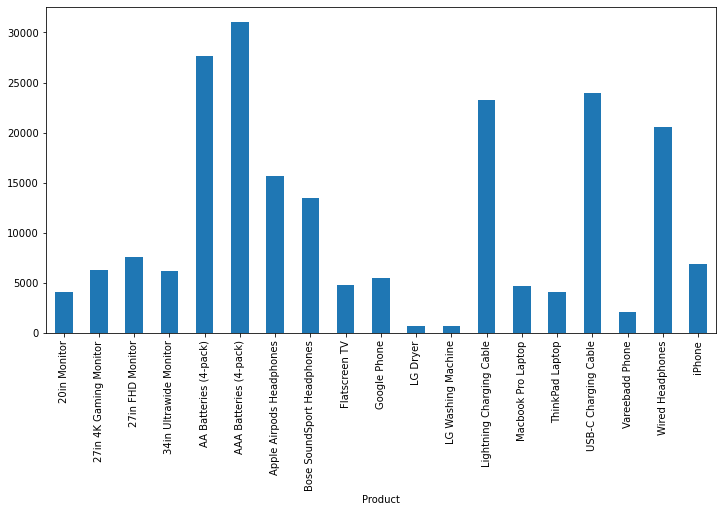

In [108]:
plt.figure(figsize=(12,6))
all_df.groupby('Product')['Quantity Ordered'].sum().plot.bar()

In [109]:
all_df.groupby('Product')['Quantity Ordered'].sum()

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int32

<AxesSubplot:xlabel='Product'>

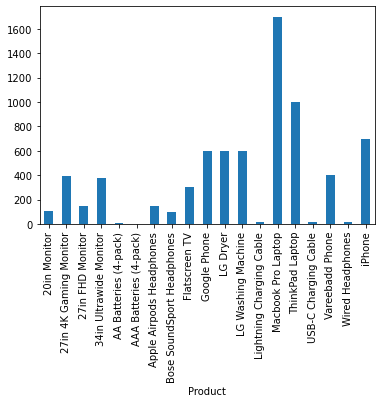

In [112]:
all_df.groupby('Product')['Price Each'].mean().plot.bar()

In [118]:
products = all_df.groupby('Product')['Quantity Ordered'].sum().index
quantity = all_df.groupby('Product')['Quantity Ordered'].sum()
price = all_df.groupby('Product')['Price Each'].mean()

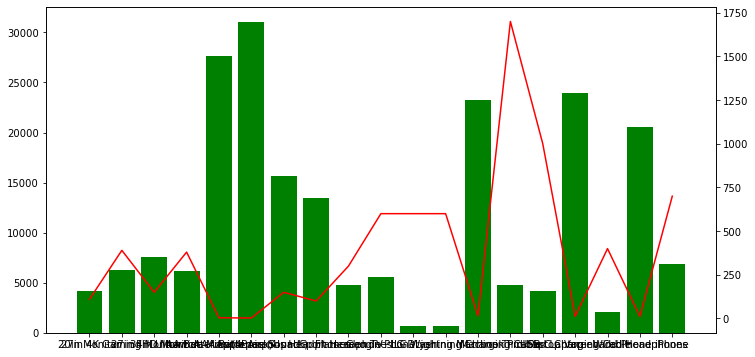

In [137]:
fig , ax1 = plt.subplots(figsize=(12,6))
ax2 = ax1.twinx()
ax1 = ax1.bar(products, quantity, color ='g')
ax2 = ax2.plot(products, price, color='r')

In [138]:
all_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date/Hour,Purchase Address,month,sales,City,hour
0,176558,USB-C Charging Cable,2,11.95,8,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,0
2,176559,Bose SoundSport Headphones,1,99.99,22,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,0
3,176560,Google Phone,1,600.00,14,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,0
4,176560,Wired Headphones,1,11.99,14,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,0
5,176561,Wired Headphones,1,11.99,9,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,0


In [140]:
df3 = all_df['Order ID'].duplicated(keep = False)
df3 = all_df[df3]
df3.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date/Hour,Purchase Address,month,sales,City,hour
3,176560,Google Phone,1,600.00,14,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,0
4,176560,Wired Headphones,1,11.99,14,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,0
18,176574,Google Phone,1,600.00,19,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,0
19,176574,USB-C Charging Cable,1,11.95,19,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,0
30,176585,Bose SoundSport Headphones,1,99.99,11,"823 Highland St, Boston, MA 02215",4,99.99,Boston,0


In [141]:
df3['Grouped'] = df3.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))
df3.head()


<ipython-input-141-ecfae18e7110>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Grouped'] = df3.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date/Hour,Purchase Address,month,sales,City,hour,Grouped
3,176560,Google Phone,1,600.00,14,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,0,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,14,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,0,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,19,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,0,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,19,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,0,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,11,"823 Highland St, Boston, MA 02215",4,99.99,Boston,0,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [143]:
df3 = df3.drop_duplicates(subset=['Order ID'])
df3.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date/Hour,Purchase Address,month,sales,City,hour,Grouped
3,176560,Google Phone,1,600.00,14,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,0,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,19,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,0,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,11,"823 Highland St, Boston, MA 02215",4,99.99,Boston,0,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,AAA Batteries (4-pack),2,2.99,17,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,0,"AAA Batteries (4-pack),Google Phone"
119,176672,Lightning Charging Cable,1,14.95,11,"778 Maple St, New York City, NY 10001",4,14.95,New York City,0,"Lightning Charging Cable,USB-C Charging Cable"


<AxesSubplot:ylabel='Grouped'>

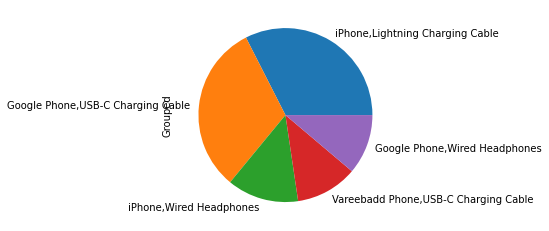

In [146]:
df3['Grouped'].value_counts()[:5].plot.pie()